In [6]:
#In this chart I will compare the performance of the stocks AAPL34 and ORCL34. Data from last 5 years
import pandas as pd
orcl = pd.read_csv('orcl.csv')
app = pd.read_csv('aapl.csv')
orcl.tail()


,Date,Open,High,Low,Close,Adj Close,Volume
1239,2020-04-30,289.390015,289.390015,289.390015,289.390015,289.390015,1100.0
1240,2020-05-04,287.029999,287.029999,287.029999,287.029999,287.029999,10.0
1241,2020-05-05,287.029999,287.029999,287.029999,287.029999,287.029999,0.0
1242,2020-05-06,297.100006,297.100006,297.100006,297.100006,297.100006,100.0
1243,2020-05-07,307.279999,307.279999,307.279999,307.279999,307.279999,100.0


In [8]:
app.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-05-08,38.000000,39.189999,38.000000,39.189999,36.195042,1400.0
1,2015-05-11,38.869999,38.869999,38.869999,38.869999,35.899494,700.0
2,2015-05-12,38.599998,38.599998,38.200001,38.400002,35.465416,15900.0
3,2015-05-13,38.459999,38.520000,38.459999,38.520000,35.576248,1400.0
4,2015-05-14,38.849998,38.849998,38.299999,38.790001,35.825611,7200.0


In [10]:
#Trading Metrics
orcl['MA10'] = orcl['Close'].rolling(10).mean()
orcl['MA60'] = orcl['Close'].rolling(60).mean()
orcl = orcl.dropna()
orcl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA60
1190,2020-02-17,239.699997,239.699997,239.699997,239.699997,239.699997,0.0,236.997002,228.875999
1191,2020-02-18,240.639999,240.639999,239.839996,239.839996,239.839996,2340.0,238.061002,228.909999
1192,2020-02-19,243.580002,243.580002,243.580002,243.580002,243.580002,610.0,239.050002,229.030166
1193,2020-02-20,243.770004,244.279999,243.770004,244.279999,244.279999,1530.0,239.937001,229.153666
1194,2020-02-21,240.419998,240.539993,240.419998,240.539993,240.539993,1220.0,240.267000,229.178499


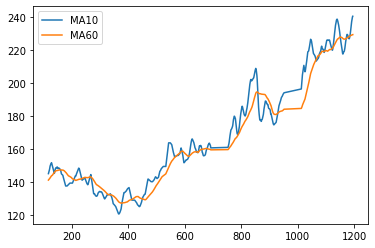

In [12]:
#MA10>MA60 means that is time to buy

import matplotlib.pyplot as plt
orcl['MA10'].plot()
orcl['MA60'].plot()
plt.legend()
plt.show()

In [14]:
app['MA10'] = app['Close'].rolling(10).mean()
app['MA60'] = app['Close'].rolling(60).mean()
app = app.dropna()
app.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA60
1190,2020-02-17,147.649994,147.649994,140.509995,142.160004,142.160004,3570.0,139.627000,124.133667
1191,2020-02-18,142.130005,142.130005,137.000000,139.720001,139.720001,27560.0,140.107001,124.596167
1192,2020-02-19,140.000000,142.190002,140.000000,141.679993,141.679993,11610.0,140.603999,125.114334
1193,2020-02-20,142.000000,142.399994,140.000000,141.270004,141.270004,15890.0,140.739000,125.632834
1194,2020-02-21,140.000000,140.000000,137.000000,138.130005,138.130005,15940.0,140.665001,126.052000


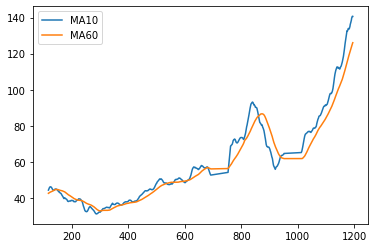

In [16]:
app['MA10'].plot()
app['MA60'].plot()
plt.legend()
plt.show()

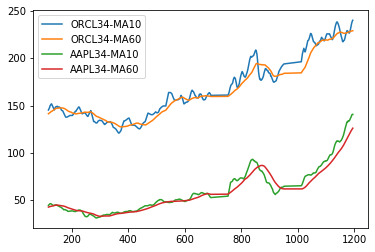

In [19]:
#Comparing both moving averages
orcl['MA10'].plot(label='ORCL34-MA10')
orcl['MA60'].plot(label='ORCL34-MA60')
app['MA10'].plot(label='AAPL34-MA10')
app['MA60'].plot(label='AAPL34-MA60')
plt.legend()
plt.show()



In [22]:
#Creating a column to identify when to buy or not, when Shares = 1, time to buy and hold
orcl['Shares'] = [1 if orcl.loc[ei,'MA10']>orcl.loc[ei,'MA60']else 0 for ei in orcl.index]
orcl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA60,Shares
1190,2020-02-17,239.699997,239.699997,239.699997,239.699997,239.699997,0.0,236.997002,228.875999,1
1191,2020-02-18,240.639999,240.639999,239.839996,239.839996,239.839996,2340.0,238.061002,228.909999,1
1192,2020-02-19,243.580002,243.580002,243.580002,243.580002,243.580002,610.0,239.050002,229.030166,1
1193,2020-02-20,243.770004,244.279999,243.770004,244.279999,244.279999,1530.0,239.937001,229.153666,1
1194,2020-02-21,240.419998,240.539993,240.419998,240.539993,240.539993,1220.0,240.267000,229.178499,1


In [24]:
app['Shares'] = [1 if app.loc[ei,'MA10']>app.loc[ei,'MA60']else 0 for ei in app.index]
app.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,MA10,MA60,Shares
1190,2020-02-17,147.649994,147.649994,140.509995,142.160004,142.160004,3570.0,139.627000,124.133667,1
1191,2020-02-18,142.130005,142.130005,137.000000,139.720001,139.720001,27560.0,140.107001,124.596167,1
1192,2020-02-19,140.000000,142.190002,140.000000,141.679993,141.679993,11610.0,140.603999,125.114334,1
1193,2020-02-20,142.000000,142.399994,140.000000,141.270004,141.270004,15890.0,140.739000,125.632834,1
1194,2020-02-21,140.000000,140.000000,137.000000,138.130005,138.130005,15940.0,140.665001,126.052000,1


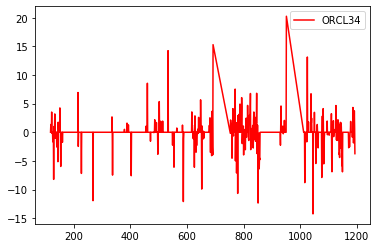

In [32]:
#comparing the profit of both--ORCL34
orcl['Close1'] = orcl['Close'].shift(-1)
orcl['Profit'] = [orcl.loc[ei,'Close1']-orcl.loc[ei,'Close'] if orcl.loc[ei,'Shares']==1 else 0 for ei in orcl.index]
orcl['Profit'].plot(label='ORCL34',color='red')
plt.legend()
plt.show()

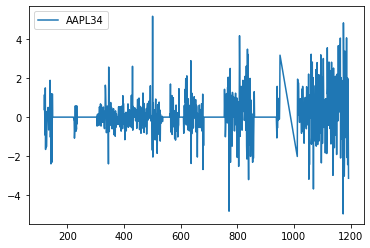

In [33]:
#now AAPL34
app['Close1'] = app['Close'].shift(-1)
app['Profit'] = [app.loc[ei,'Close1']-app.loc[ei,'Close'] if app.loc[ei,'Shares']==1 else 0 for ei in app.index]
app['Profit'].plot(label='AAPL34')
plt.legend()
plt.show()

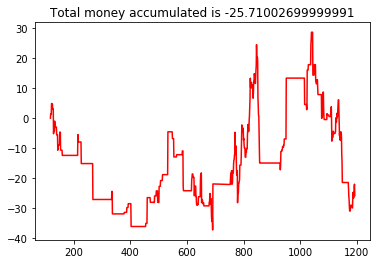

In [55]:
#checking wealth accumulated for the shareholder during this period of time
orcl['Wealth'] = orcl['Profit'].cumsum()
orcl['Wealth'].plot(color='red')
plt.title('Total money accumulated is {}'.format(orcl.loc[orcl.index[-2], 'Wealth']))
plt.show()

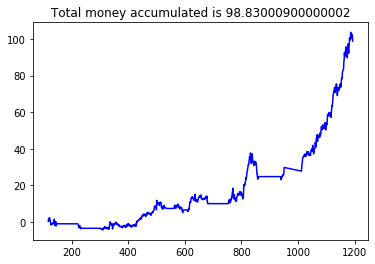

In [58]:
app['Wealth'] = app['Profit'].cumsum()
app['Wealth'].plot(color = 'blue')
plt.title('Total money accumulated is {}'.format(app.loc[app.index[-2], 'Wealth']))
plt.show()

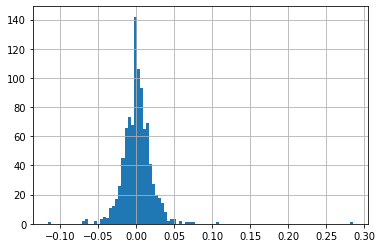

In [60]:
#checking %change distribution of AAPL34
import numpy as np
from scipy.stats import norm
app['LogReturns'] = np.log(app['Close']).shift(-1)-np.log(app['Close'])
app['LogReturns'].hist(bins=100)

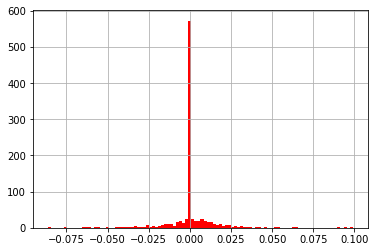

In [67]:
orcl['LogReturns'] = np.log(orcl['Close']).shift(-1)-np.log(orcl['Close'])
orcl['LogReturns'].hist(bins=100,color='red')

In [71]:
#risk metrics
mu_orcl = orcl['LogReturns'].mean()
sigma_orcl = orcl['LogReturns'].std(ddof=1)
prob1 = norm.cdf(-0.05,mu_orcl,sigma_orcl)
print('Probability of ORCL34 losing 5% of value in a day',prob1)

Probability of ORCL34 losing 5% of value in a day 0.00013157869953046443


In [73]:
#now AAPL34
mu_app = app['LogReturns'].mean()
sigma_app = app['LogReturns'].std(ddof=1)
prob2 = norm.cdf(-0.05,mu_app,sigma_app)
print('Probability of AAPL34 losing 5% of value in a day',prob2)

Probability of AAPL34 losing 5% of value in a day 0.005552263781665018


In [75]:
#95 VAR(value at risk) of ORCL34
var_95_orcl34 = norm.ppf(1-0.95,mu_orcl,sigma_orcl)
var_95_orcl34

-0.022261033694528996

In [77]:
#95% VAR of AAPL34
var_95_app = norm.ppf(1-0.95,mu_app,sigma_app)
var_95_app

-0.031974806692308386